<a href="https://colab.research.google.com/github/Tizartijo/LearnPhy_ML/blob/master/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# **GRADIENT DESCENT ALGORITHMS**
(Manual functions)

---

# Implementation of linear regression with two coefficients

[ 0.05023546 -1.04498937]
[ 0.05023547 -1.0449894 ]


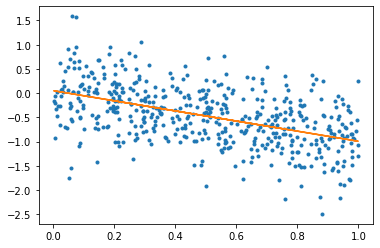

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def batch_grad_desc(X,y,coef,alfa=0.5,nV=100):  
  N = y.shape[0]

  for i in range(nV):
    yhat  = X@coef 
    error = yhat-y

    # Partial derivative and coefficient update
    coef[0] = coef[0] - alfa * 1/N * np.sum(error)
    coef[1] = coef[1] - alfa * 1/N * np.sum(error*X[:,1])
  return coef

# Linear regression calculation by gradient descent algorithm
np.random.seed(303)

# Settings
N    = 500
nV   = 500
alfa = 0.5

coef = np.array([0.0,0.0]) # Initial guess
x = np.random.rand(N)
y = -x+np.random.randn(N)*0.5

# add a column of ones before x vector
X = np.vstack((np.ones_like(x),x)).T

# Gradient descent algorithm
coef = batch_grad_desc(X,y,coef,alfa,nV)

# Coefficient projection
yhat  = X@coef 

# Compare result with linear regression fit by matrix multiplication
beta = np.linalg.inv(X.T@X) @ (X.T@y)

print(coef)
print(beta)

plt.plot(x,y,'.')
plt.plot(x,yhat)
plt.show()

# Implementation of linear regression with N coefficients

nCoeff: 3
Coef 1: [-9.03086286  5.96808374 -1.464658  ]
Coef 2: [-9.06190551  5.980027   -1.42573447]
Errors: 0.9925576417294113 0.9948717052016441


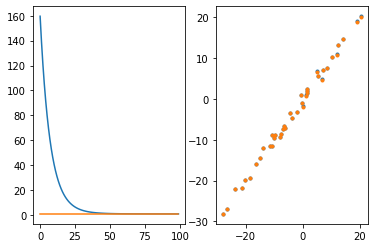

In [60]:
import numpy as np
from matplotlib import pyplot as plt

def batch_grad_desc(X,y,coef,alfa=0.05,nV=100):  
  N  = X.shape[0]
  nc = coef.shape[0]
  E = np.zeros(nV)

  for i in range(nV):
    yhat  = X@coef 
    error = yhat-y
    E[i] = np.mean(error**2)

    # Partial derivative and coefficient update
    for c in range(nc):
      coef[c] = coef[c] - alfa * 1/N * np.sum(error*X[:,c])

  return coef,E

def ordinary_least_squares(X, y):
  # Compute theta_hat using OLS
  theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y  
  return theta_hat

# Linear regression calculation by gradient descent algorithm
# np.random.seed(33)

# Settings
N    = 40
nvar = 2
nV   = 100
alfa = 0.05

# Draw x and calculate y
theta = np.random.randint(-10,10,nvar+1)
# theta = [0, -2, -3]

X = np.ones((N,nvar+1))
for nc in range(nvar):
  X[:,nc] = np.random.uniform(-2, 2, N)
noise = np.random.randn(N)
y = X @ theta + noise 

# Gradient descent algorithm
coef = np.zeros(nvar+1) # Initial guess
coef,E = batch_grad_desc(X,y,coef,alfa,nV)

# Compare result with normal linear regression fit 
beta = ordinary_least_squares(X, y)

# Coefficient projection
yhat1  = X@beta 
yhat2  = X@coef 

error1 = np.mean((y-yhat1)**2)
error2 = np.mean((y-yhat2)**2)

print('nCoeff:',coef.shape[0])
print('Coef 1:',coef)
print('Coef 2:',beta)
print('Errors:',error1,error2)

# Plots
plt.subplot(1,2,1)
plt.plot(E)
plt.plot(np.ones(nV)*error1)

plt.subplot(1,2,2)
plt.plot(y,yhat1,'.')
plt.plot(y,yhat2,'.')
plt.show()


# Implementation of Polinomial regression ¿?

---


### Structure design matrix

Create a function (`make_design_matrix`) that structures the design matrix given the input data and the order of the polynomial you wish to fit

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [44]:
def make_design_matrix(x, order):
  """Create the design matrix of inputs for use in polynomial regression
  Args:
    x (ndarray): input vector of shape (samples,)
    order (scalar): polynomial regression order
  Returns:
    ndarray: design matrix for polynomial regression of shape (samples, order+1)
  """

  # Broadcast to shape (n x 1) so dimensions work
  if x.ndim == 1:
    x = x[:, None]

  #if x has more than one feature, we don't want multiple columns of ones so we assign
  # x^0 here
  design_matrix = np.ones((x.shape[0], 1))

  # Loop through rest of degrees and stack columns (hint: np.hstack)
  for degree in range(1, order + 1):
      design_matrix = np.hstack((design_matrix, x**degree))

  return design_matrix

In [113]:
def plot_fitted_polynomials(x, y, theta_hat,order):
  """ Plot polynomials of different orders

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    theta_hat (dict): polynomial regression weights for different orders
  """

  x_grid = np.linspace(x.min() - .5, x.max() + .5)

  X_design = make_design_matrix(x_grid, order)
  y_fit    = X_design @ theta_hat

  return x_grid,y_fit

### Fitting polynomial regression models with different orders 


Fit polynomial regression models to find the regression coefficients ($\theta_0, \theta_1, \theta_2,$ ...) by solving the least squares problem. Create a function `solve_poly_reg` that loops over different order polynomials (up to `max_order`), fits that model, and saves out the weights for each. You may invoke the `ordinary_least_squares` function.

[-1.65430891 -1.06184651  0.91838323  0.10285994 -0.05894612]
[-1.57019393 -0.99111648  0.85469466  0.0871241  -0.05083519]


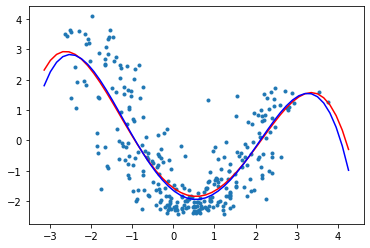

In [127]:
# Generate random samples
np.random.seed(121)
n_samples = 300
x = np.random.uniform(-2, 2.5, n_samples)  # inputs uniformly sampled from [-2, 2.5)
y =  x**2 - x - 2   # computing the outputs

output_noise = 1/8 * np.random.randn(n_samples)
y += output_noise  # adding some output noise

input_noise = 1/2 * np.random.randn(n_samples)
x += input_noise  # adding some input noise

# Fit polynomial regression by fitting with linear regression
order = 4

# Create design matrix
X_design = make_design_matrix(x, order)

# Fit polynomial model by simple linear least squares
beta = ordinary_least_squares(X_design, y)

# Fit by gradient descent (linear fitting)
alfa = 0.0001
nV   = 100000
coef,E = batch_grad_desc(X_design,y,np.zeros(order+1),alfa,nV)

print(beta)
print(coef)

xgd,ygd   = plot_fitted_polynomials(x, y, coef,order)
xlin,ylin = plot_fitted_polynomials(x, y, beta,order)

plt.plot(x,y,'.')
plt.plot(xgd,ygd,'r')
plt.plot(xlin,ylin,'b')
plt.show()

# Sigmoid function

---

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [161]:
x = np.linspace(-10,10,100)
y = 1 / (1 + np.exp(-x))

# Change origin and slope coefficients
theta = np.array([5,1])
X = np.c_[np.ones((x.shape[0], 1)), x]

Y = 1 / (1 + np.exp(-X@theta))

plt.plot(x,y,'b')
plt.plot(x,Y,'r')

ValueError: ignored

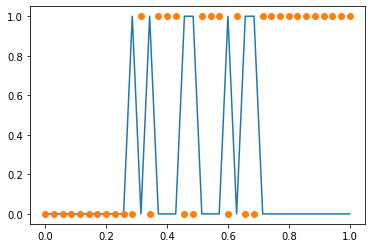

In [284]:
def sigmoid(X,theta):    
  return 1 / (1 + np.exp(-X@theta))

y = np.array([0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1])
x = np.linspace(0,1,y.shape[0])
x = np.c_[np.ones((x.shape[0], 1)), x]


theta = np.array([0,2])

cost = y*1
cost[y==1] = -np.log(sigmoid(x[y==1,:],theta))
cost[y==0] = -np.log(1-sigmoid(x[y==0,:],theta))

plt.plot(x[:,1],cost,'-')
plt.plot(x[:,1],y,'o')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


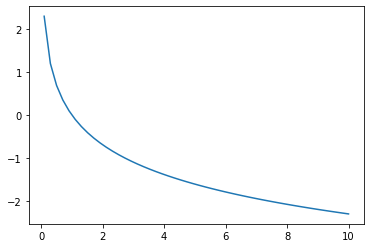

In [285]:
x = np.linspace(-10,10,100)
y = -np.log(x)

plt.plot(x,y)

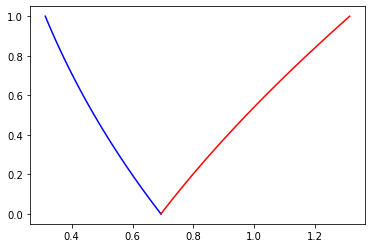

In [301]:
theta = np.array([0,1])

x = np.linspace(0,1,100)
x = np.c_[np.ones((x.shape[0], 1)), x]

# Logistic Cost function  ¿?
Y1 = -np.log(  sigmoid(x,theta))
Y2 = -np.log(1-sigmoid(x,theta))

plt.plot(Y1,x[:,1],'b')
plt.plot(Y2,x[:,1],'r')
# plt.xlim(-.05,1)

In [302]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [304]:
def cost_function(self, theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
            y * np.log(    probability(theta, x)) + (1 - y) * 
                np.log(1 - probability(theta, x))              )
    return total_cost

def gradient(self, theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

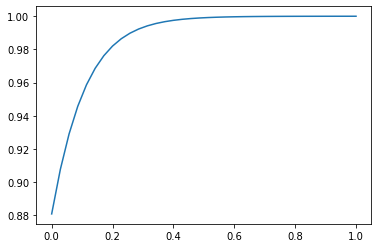

In [281]:
y = np.array([0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1])
y = y[:, np.newaxis]
x = np.linspace(0,1,y.shape[0])
x = np.c_[np.ones((x.shape[0], 1)), x]


theta = np.zeros((x.shape[1], 1))
theta = np.array([2,10])

Y = probability(theta, x)

plt.plot(x[:,1],Y)


# def fit(self, x, y, theta):
#     opt_weights = fmin_tnc(func=cost_function, x0=theta,
#                   fprime=gradient,args=(x, y.flatten()))
#     return opt_weights[0]
# parameters = fit(X, y, theta)

